# **Speech Emotion Recognition Assistant (SERA)**

The following jupyter notebook consists of the entire code to implement SERA.
This project intends to create a sophisticated system that can effectively recognize and understand human emotions from voice signals.

Emotions play an important part in human communication, influencing interactions in a variety of fields like healthcare, education, customer service, and others. However, accurately interpreting emotions simply through speech can be difficult, particularly in situations where nonverbal indicators are lacking.

SERA overcomes this issue by using advanced machine learning algorithms to recognize and classify emotions communicated through spoken language.

## **Methodology:**

The SERA project comprises of a multistage process designed to capture and analyze raw audio files for emotions by extracting audio features such as spectral content, pitch and intensity. This is followed by splitting the data and validating it over ML models to achieve a good classification of emotions. A general outlook of each step is as follows:


1. Loading the data and preprocessing
2. Performing an Exploratory Data Analysis to understand the features we are dealing with
3. Splitting and Preparing our data for feature extraction
4. Performing feature engineering processes
5. Applying Baseline models and determining best models
7. Testing our best model's performance
8. Saving appropriate files and models in order to build a working front end

# **Installs and Imports**
We begin with installing and importing all the necessary python modules that will be used in the project.

In [ ]:
#Uncomment the following install statement if the imports are not working
!pip install pandas numpy matplotlib seaborn scikit-learn librosa torchaudio torch tqdm SoundFile keras optuna joblib
#!apt-get install ffmpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 998.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Data processing and loading
import pandas as pd
import numpy as np
import os
import sys
import glob

# To load and save data from Google Drive
from google.colab import drive
import pickle

# Data visualization
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Progress bar library

# Audio file analysis
from IPython.display import Audio, display  # Audio playback in notebook
import librosa  # Audio analysis library
import librosa.display  # Display functions for librosa
import torchaudio  # Audio processing library for PyTorch
import torch  # Deep learning library
import soundfile  # Sound file reading/writing library

# Model Preprocessing
from sklearn.model_selection import StratifiedShuffleSplit  # Cross-validation splitter
from sklearn.model_selection import StratifiedKFold  # Cross-validation splitter
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Data preprocessing utilities

# Model Selection
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier

from keras.models import Sequential  # Keras sequential model
from keras.layers import (Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization)  # Keras layers
from keras.callbacks import ReduceLROnPlateau  # Keras callback for reducing learning rate

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Hyperparameter optimization
import optuna

# Ignore warnings
import warnings  # Warning control module
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


# **Loading our Data**

Once we have made the necessary imports we mount our google drive which contains our datasets:



*   RAVDESS (The Ryerson Audio-Visual Database of Emotional Speech and Song)
*   TESS (Toronto Emotional Speech Set)
*   SAVEE (Surrey Audio Visual Expressed Emotion)



In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Paths for data on Google Drive.
Ravdess = "/content/drive/MyDrive/Datasets/RAVDESS/"
Tess = "/content/drive/MyDrive/Datasets/TESS/"
Savee = "/content/drive/MyDrive/Datasets/SAVEE/"

In [ ]:
#loading the RAVDESS dataset
file_emotion=[]
file_path=[]

ravdess_list = os.listdir(Ravdess)
for dir in ravdess_list:
  actor = os.listdir(Ravdess+dir)
  for file in actor:
    part = file.split('.')[0]
    part = part.split('-')
    file_emotion.append(int(part[2]))
    file_path.append(Ravdess+dir+'/'+file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df =pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df,path_df], axis=1)
# dataframe for path of files.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

<ipython-input-5-bc8253bbd9c2>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


Emotions                                               Path
0    happy  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...
1    angry  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...
2      sad  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...
3    angry  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...
4    angry  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...

In [ ]:
#Loading the TESS dataset
file_emotion = []
file_path = []
tess_list = os.listdir(Tess)
for dir in tess_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0  disgust  /content/drive/MyDrive/Datasets/TESS/OAF_disgu...
1  disgust  /content/drive/MyDrive/Datasets/TESS/OAF_disgu...
2  disgust  /content/drive/MyDrive/Datasets/TESS/OAF_disgu...
3  disgust  /content/drive/MyDrive/Datasets/TESS/OAF_disgu...
4  disgust  /content/drive/MyDrive/Datasets/TESS/OAF_disgu...

In [ ]:
#Loading the SAVEE dataset
file_emotion = []
file_path = []
savee_list = os.listdir(Savee)
for file in savee_list:
  file_path.append(Savee+file)
  part = file.split('_')[1]
  ele = part[:-6]
  if ele=='a':
      file_emotion.append('angry')
  elif ele=='d':
      file_emotion.append('disgust')
  elif ele=='f':
      file_emotion.append('fear')
  elif ele=='h':
      file_emotion.append('happy')
  elif ele=='n':
      file_emotion.append('neutral')
  elif ele=='sa':
      file_emotion.append('sad')
  else:
      file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                              Path
0    angry  /content/drive/MyDrive/Datasets/SAVEE/DC_a01.wav
1    angry  /content/drive/MyDrive/Datasets/SAVEE/DC_a14.wav
2    angry  /content/drive/MyDrive/Datasets/SAVEE/DC_a02.wav
3    angry  /content/drive/MyDrive/Datasets/SAVEE/DC_a03.wav
4    angry  /content/drive/MyDrive/Datasets/SAVEE/DC_a05.wav

In [ ]:
# creating a combined dataframe with emotions and paths to audios for each dataset
data_path = pd.concat([Ravdess_df, Tess_df, Savee_df], axis = 0)
#data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0    happy  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...
1    angry  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...
2      sad  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...
3    angry  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...
4    angry  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...

In [ ]:
data_path.shape

(4720, 2)

In [ ]:
# Function to extract gender from Path
def extract_gender(path):
    if "RAVDESS" in path:
        actor_num = int(path.split("Actor_")[1].split("/")[0])
        if actor_num % 2 == 0:
            return 'Female'
        else:
            return 'Male'
    elif "TESS" in path:
        return 'Female'
    elif "SAVEE" in path:
        return 'Male'
    else:
        return None

# Apply function to create Gender column
data_path['Gender'] = data_path['Path'].apply(extract_gender)
data_path.head()

Emotions                                               Path  Gender
0    happy  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...  Female
1    angry  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...  Female
2      sad  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...  Female
3    angry  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...  Female
4    angry  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...  Female

# **Exploratory Data Analysis**
Now that we have successfully loaded all our data and created the data_path dataframe, we can use certain visualization libraries to better understand our data summary. Here we explore our datasets in combination and further use audio analysis libraries to better understand the feature extraction process.


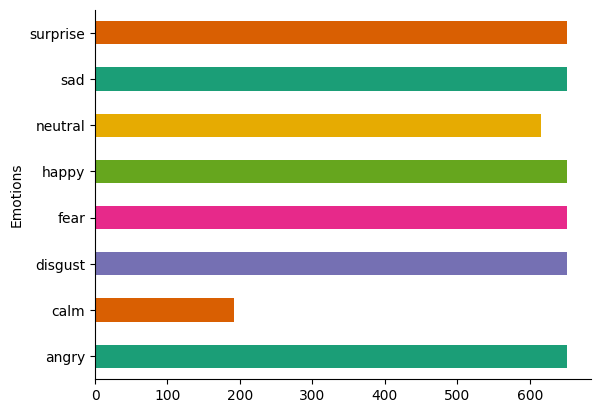

In [ ]:
# @title Emotions Frequency
data_path.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Emotions', ylabel='count'>

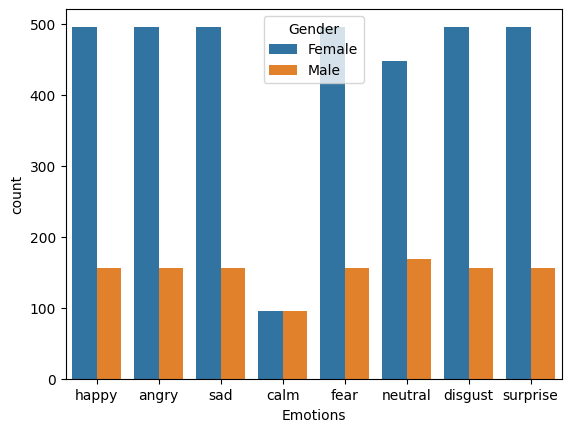

In [ ]:
# @title Emotion Distribution by Gender

sns.countplot(x="Emotions", hue="Gender", data=data_path)

In [ ]:
# Function to display waveplot and spectrogram for an audio file
def display_audio_features(file_path, emotion):
    waveform, sample_rate = torchaudio.load(file_path)

    # Display emotion title
    print(f"An example of {emotion} in our dataset:")

    # Display waveplot
    plt.figure(figsize=(10, 4))
    plt.title(f'Waveplot for {file_path}')
    plt.plot(waveform.t().numpy())
    plt.show()

    # Display spectrogram
    plt.figure(figsize=(10, 4))
    plt.title(f'Spectrogram for {file_path}')
    S = librosa.feature.melspectrogram(y=waveform.squeeze().numpy(), sr=sample_rate, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


# Function to play the associated audio file
def play_audio(file_path):
    display(Audio(filename=file_path))

An example of happy in our dataset:


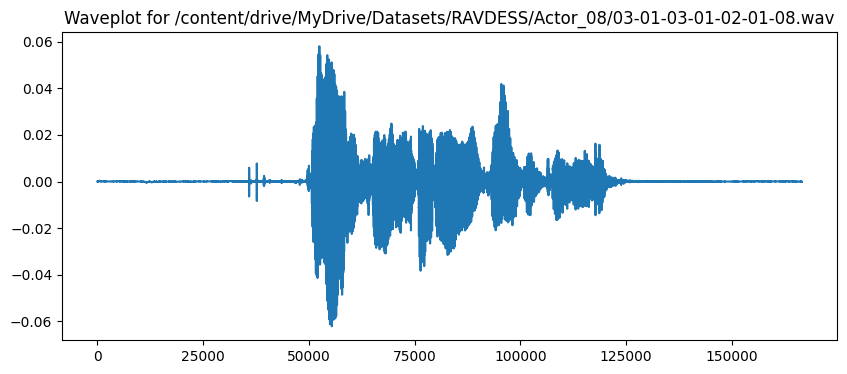

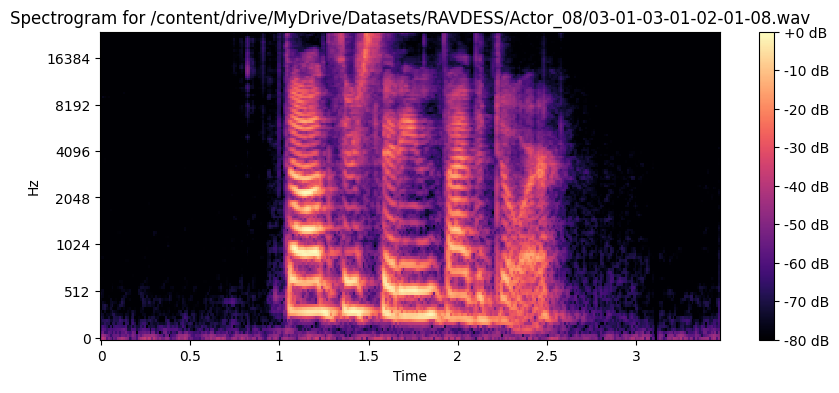

An example of angry in our dataset:


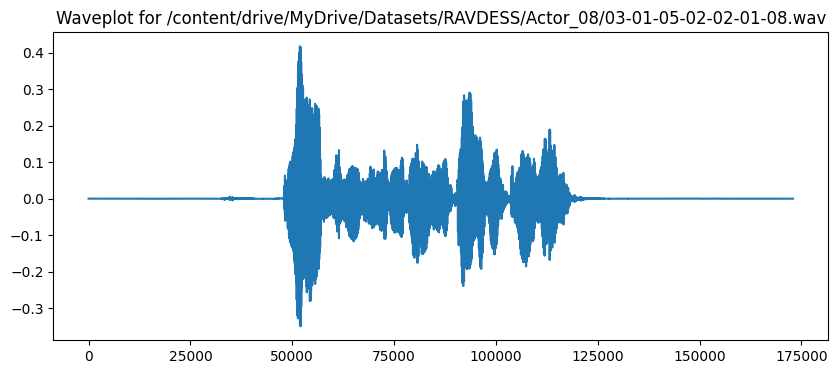

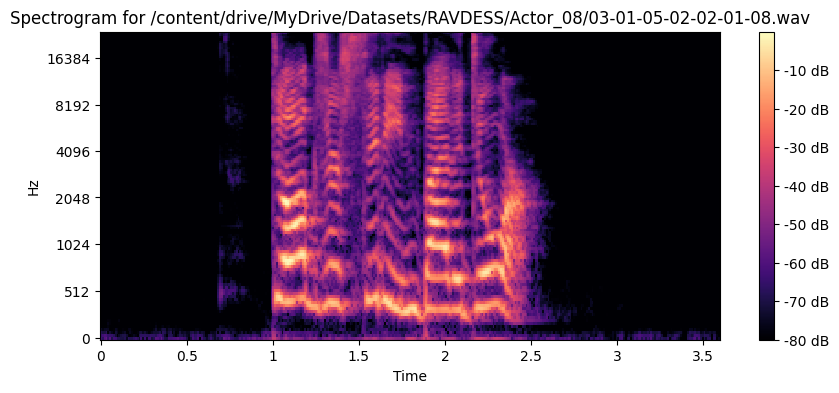

An example of sad in our dataset:


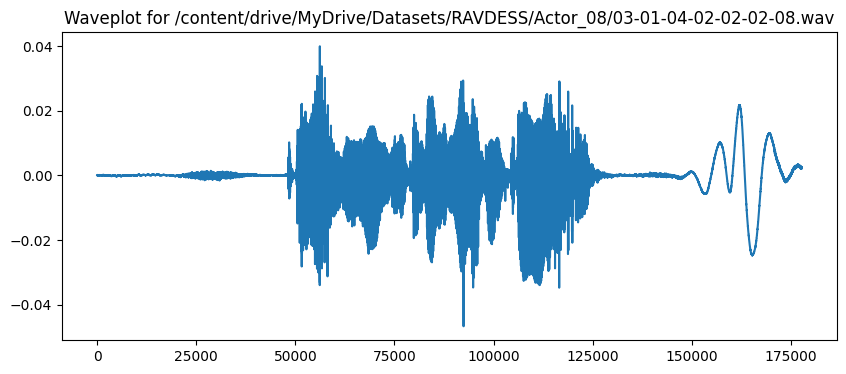

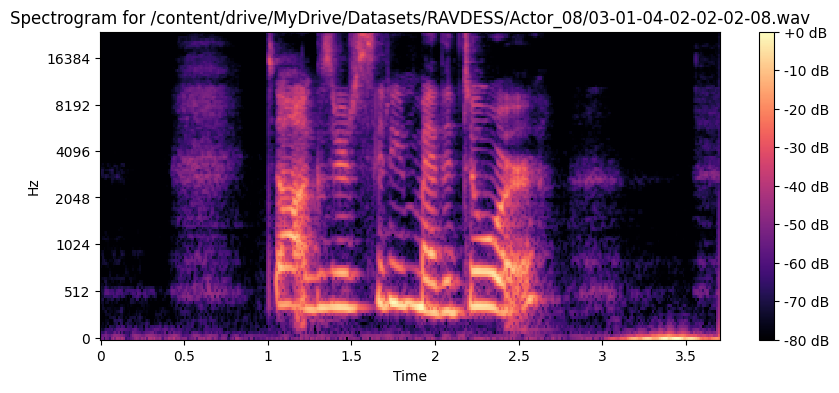

An example of calm in our dataset:


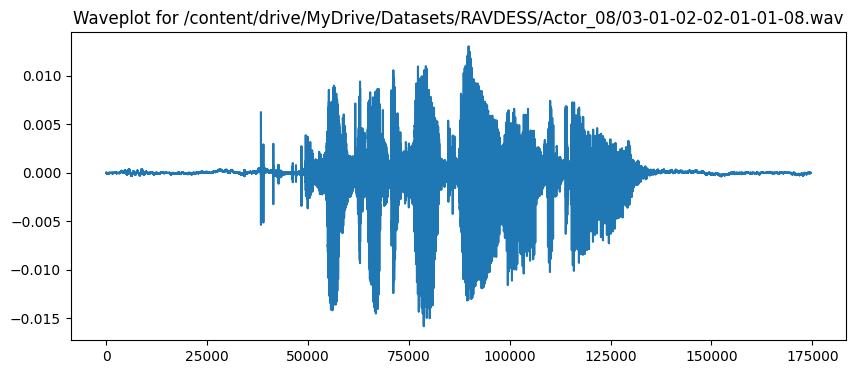

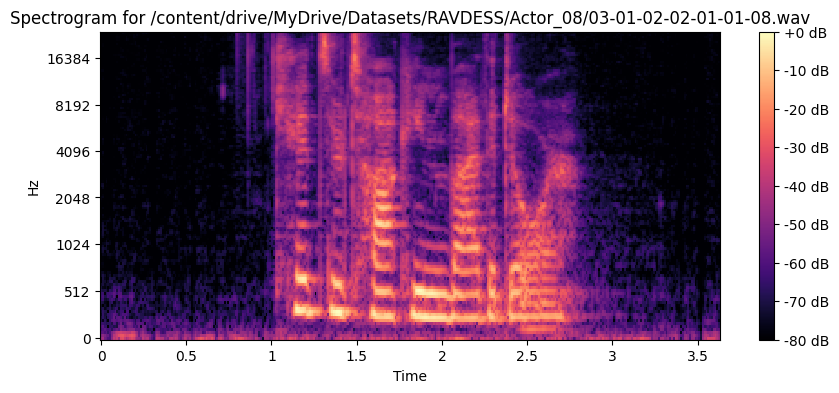

An example of fear in our dataset:


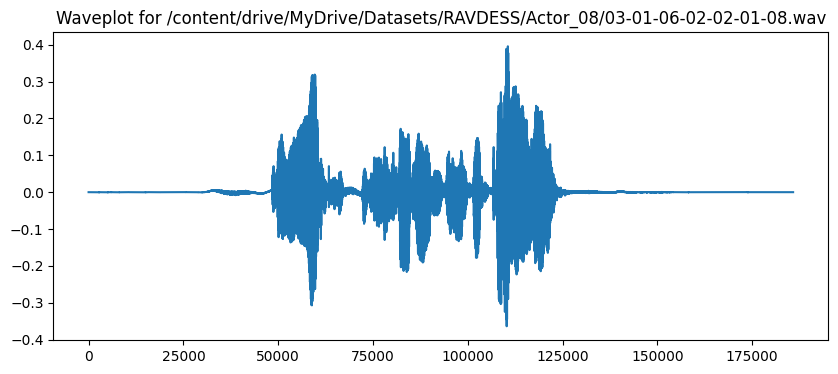

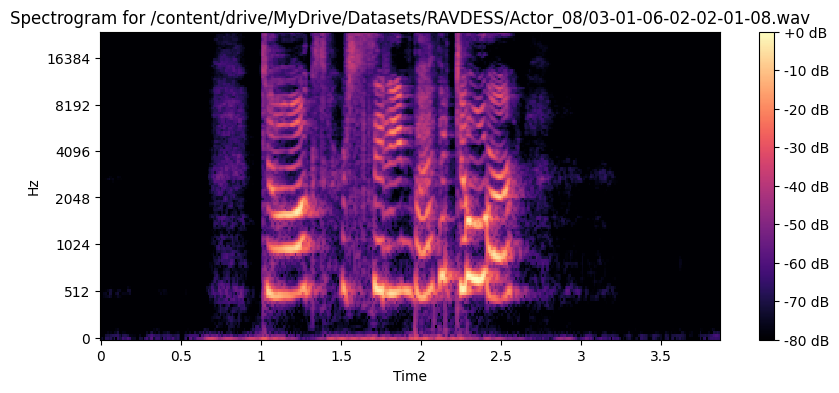

An example of neutral in our dataset:


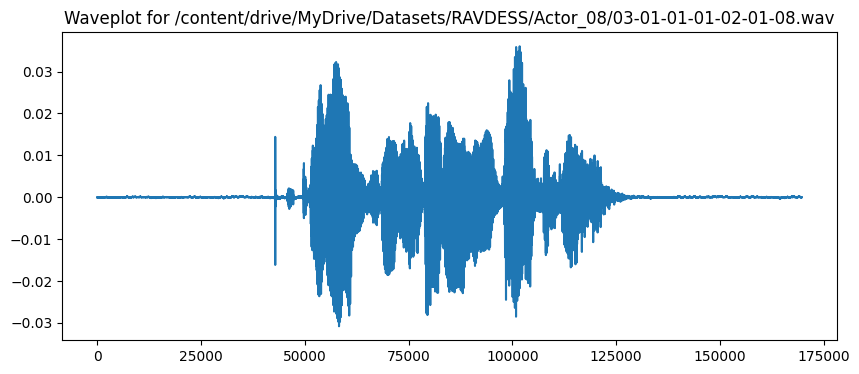

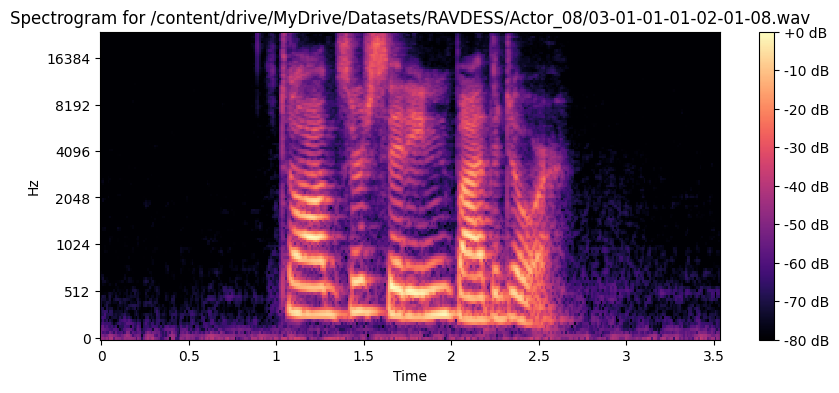

An example of disgust in our dataset:


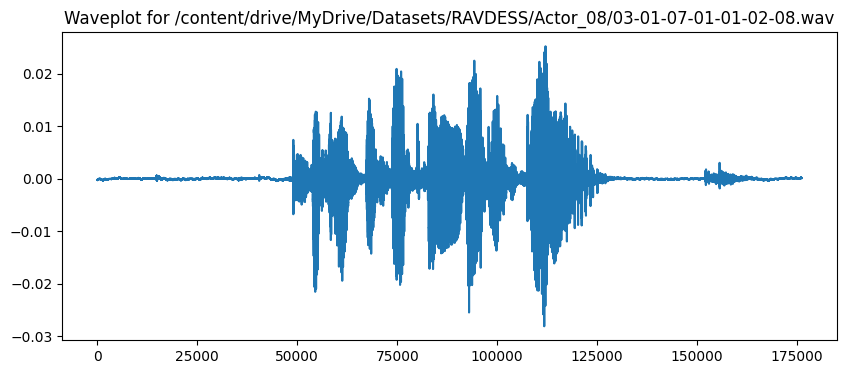

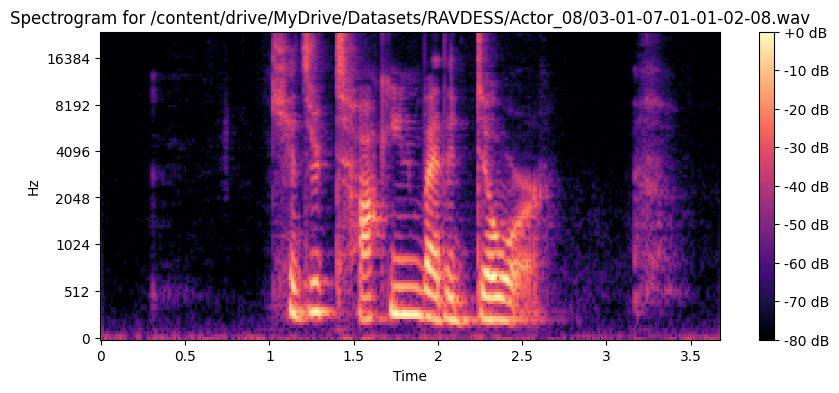

An example of surprise in our dataset:


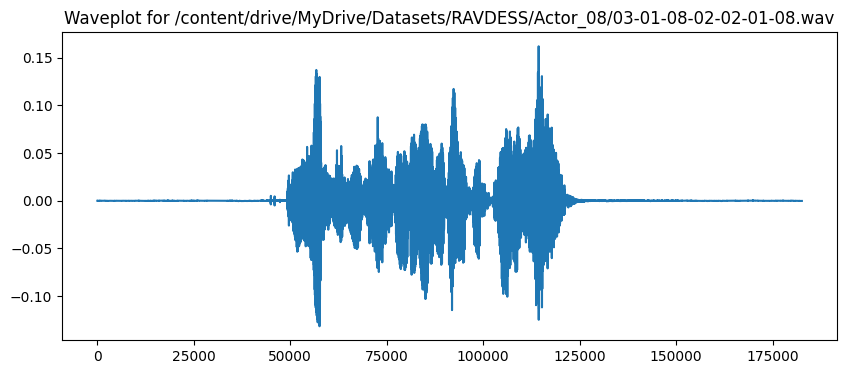

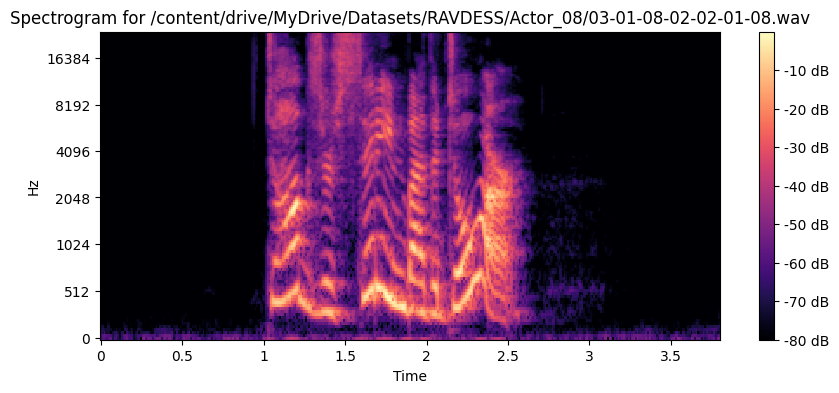

In [ ]:
# Explore data features
for emotion in data_path['Emotions'].unique():
    # Select one example for each emotion
    example_file_path = data_path[data_path['Emotions'] == emotion]['Path'].iloc[0]

    # Display audio features
    display_audio_features(example_file_path, emotion)

    # Play the associated audio file
    play_audio(example_file_path)

# **Inferences and Balancing our Data**
From the above exploratory data analysis, we can infer that the dataset seems to be highly imbalanced when it comes to the emotion of 'calm'. Furthermore, we can also see that the emotion of 'neutral' is slightly imbalanced as well. Another key point to note is that the dataset as a higher quantity of female audios in comparison to male audios, and upon listening to the audio itself, it can be gathered that the dataset is predominantly recorded by native english speakers.


In order to proceed, we decided it would be better to completely eliminate the 'calm' emotion and further downsample our dataset so as to make it balanced. We decided to leave the male - female split as it was and further concurred upon using solely the audio features in order to classify for our emotions completely disregarding the gender.



In [ ]:
data_path = data_path[~data_path['Emotions'].isin([ 'calm' ] )]

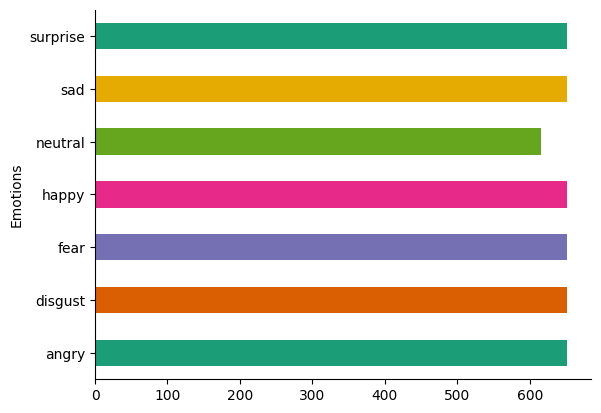

In [ ]:
# @title Emotions Frequency after eliminating Calm
data_path.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Balancing The data for neutral

balanced_data = pd.DataFrame()
emotions_shortlisted = list(data_path.groupby('Emotions').size().reset_index().Emotions)
for emotion in emotions_shortlisted:
  emotion_data = data_path[data_path['Emotions'] == emotion]
  emotion_data_downsampled = emotion_data.sample(n=616, random_state=42, replace = False)
  balanced_data = pd.concat([balanced_data, emotion_data_downsampled])

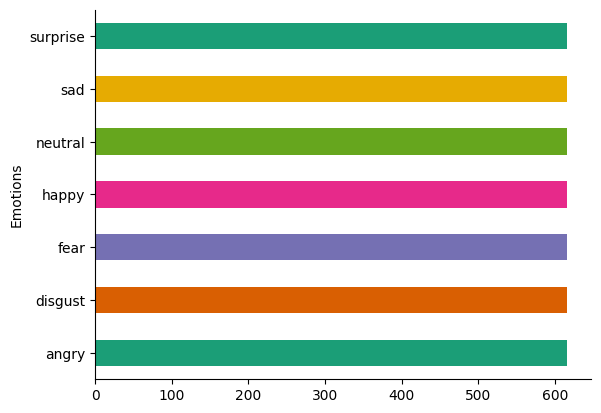

In [ ]:
# @title Emotions Frequency for Balanced Data
balanced_data.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Data Preparation for Feature Extraction**
In this step, we begin by splitting our balanced dataset using a stratified shuffle split. This is done so that we can perform a cross validation later on and further maintains the proportion of class distributions. Even though we have balanced our dataset, using this splitting technique can provide a better and more robust approach.

After performing our split, and understanding the shape of our training data and testing data, we standardize our audio files before extracting its features using the librosa library. This is done in the convert audios function and is necessary to make the audio files compatible with librosa.


In [ ]:
# Suppose X contains features and y contains target variable and column_name is the name of the column you want to use for stratification

# Initialize StratifiedShuffleSplit with desired parameters
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

# Obtain the index for train and test sets
for train_index, test_index in stratified_splitter.split(balanced_data, balanced_data['Emotions']):
    train, test = balanced_data.iloc[train_index], balanced_data.iloc[test_index]


(3665, 3)

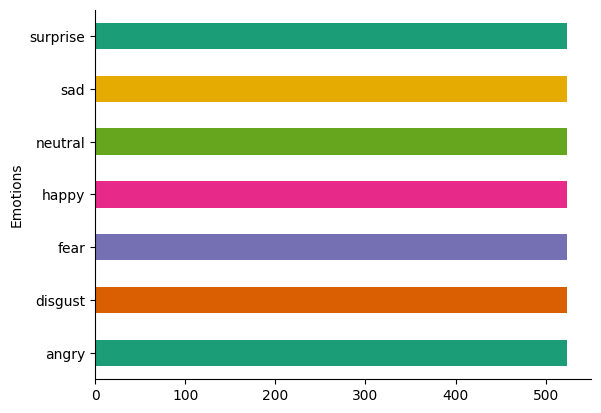

In [ ]:
#view the shape of training split
train.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
train.shape

In [ ]:
train.head()

Emotions                                               Path  Gender
1698  neutral  /content/drive/MyDrive/Datasets/TESS/YAF_neutr...  Female
236     angry  /content/drive/MyDrive/Datasets/TESS/YAF_angry...  Female
2648      sad  /content/drive/MyDrive/Datasets/TESS/YAF_sad/Y...  Female
1296  disgust  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...  Female
2763      sad  /content/drive/MyDrive/Datasets/TESS/YAF_sad/Y...  Female

(647, 3)

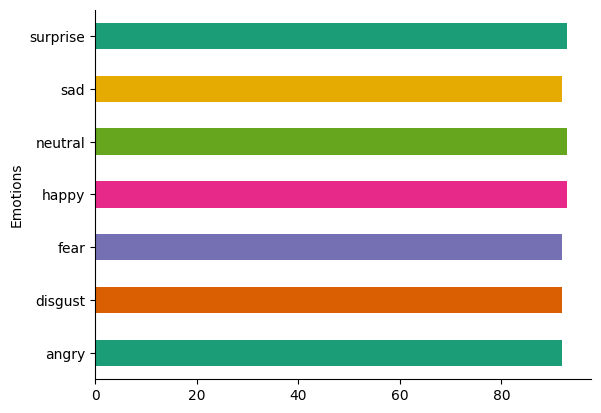

In [ ]:
#view the shape of testing split
test.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
test.shape

In [ ]:
test.head()

Emotions                                               Path  Gender
823     fear  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...  Female
433      sad  /content/drive/MyDrive/Datasets/TESS/OAF_Sad/O...  Female
145    happy  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...  Female
385  disgust   /content/drive/MyDrive/Datasets/SAVEE/KL_d01.wav    Male
764  disgust  /content/drive/MyDrive/Datasets/RAVDESS/Actor_...    Male

In [ ]:
def convert_audio(audio_path, target_path, remove=False):
    """This function sets the audio `audio_path` to:
        - 16000 Hz Sampling rate
        - one audio channel ( mono )
            Params:
                - audio_path (str): the path of audio wav file you want to convert
                - target_path (str): target path to save your new converted wav file
                - remove (bool): whether to remove the old file after converting
    """

    os.system(f"ffmpeg -i {audio_path} -ac 1 -ar 16000 {target_path}")

    if remove:
        os.remove(audio_path)

def convert_audios(df, target_path, remove=False):
    for index, row in tqdm(df.iterrows(), total = df.shape[0] ): #tqdm library shows a progress bar for looping statements
        audio_path = row['Path']
        emotion = row['Emotions']
        target_dir = os.path.join(target_path, emotion)
        if not os.path.isdir(target_dir):
            os.makedirs(target_dir)

        filename = os.path.basename(audio_path)
        target_file = os.path.join(target_dir, filename)
        convert_audio(audio_path, target_file, remove=remove)

In [ ]:
# Creating data for balanced train
convert_audios = False #set to false since we already ran this and have the data saved in the mentioned paths
if convert_audios:
  convert_audios(train, target_path ='/content/drive/MyDrive/Datasets/Finally_final_final_Balanced_train_data')
  convert_audios(test, target_path ='/content/drive/MyDrive/Datasets/Finally_final_final_Balanced_test_data' )

# **Feature Extraction and Engineering**
Now that we have standardised our audio files and made them compatible with librosa, our next step involves extracting features from them. The features that we have chosen to involve for our classification, include the following:

1. MFCC (Mel-Frequency Cepstral Coefficients):
  - MFCCs represent the short-term power spectrum of a sound.
  - The process involves taking the Fourier transform of the signal and then mapping the resulting spectrum onto the mel scale, which is a perceptual scale of pitches based on human hearing.
  - MFCCs capture the timbral and spectral characteristics of audio signals.

2. Chroma:
  - Chroma features represent the energy distribution of different pitch classes (i.e., musical notes) within an audio signal and are also derived from the short-time Fourier transform of the audio signal.
  - They can be used to capture the harmonic content and tonal characteristics of music signals.

3. MEL Spectrogram Frequency:
  - Mel spectrograms are similar to traditional spectrograms but are computed using a mel filterbank.
  - They represent the power spectral density of an audio signal over time.
  - Mel spectrograms provide a compact representation of the frequency content of an audio signal.

4. Spectral Contrast:
  - Spectral contrast measures the difference in energy between peaks and valleys in the spectrum of an audio signal and provides information about the spectral texture and tonal characteristics.

5. Tonnetz (Tonnetz Features):
  - Tonnetz features are derived from the Tonnetz, which is a mathematical representation of musical pitch relationships based on tonal harmony theory.
  - They capture the harmonic relationships between musical notes in an audio signal.
  - They provide a compact representation of the harmonic content and tonal structure of music signals.


Upon successfully extracting them, we proceed with saving these on our drive and loading them for usage where we perform certain preprocessing (engineering) tasks such as scaling and one hot encoding to make our data compatible with our models.

In [ ]:
def extract_feature(file_name, **kwargs):
    """
    Extract features from audio file `file_name`.
    Supported features:
    - MFCC (mfcc)
    - Chroma (chroma)
    - MEL Spectrogram Frequency (mel)
    - Spectral Contrast (contrast)
    - Tonnetz (tonnetz)
    Args:
    - file_name: path to the audio file
    - kwargs: dictionary of features to extract
    Returns:
    - extracted features (including means and standard deviations)
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")

    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        print(X)

        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = []
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            mfccs_std = np.std(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result.append(np.hstack((mfccs, mfccs_std)))
        if chroma:
            chroma_mean = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            chroma_std = np.std(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result.append(np.hstack((chroma_mean, chroma_std)))
        if mel:
            mel_mean = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            mel_std = np.std(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result.append(np.hstack((mel_mean, mel_std)))
        if contrast:
            contrast_mean = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
            contrast_std = np.std(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
            result.append(np.hstack((contrast_mean, contrast_std)))
        if tonnetz:
            tonnetz_mean = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0)
            tonnetz_std = np.std(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0)
            result.append(np.hstack((tonnetz_mean, tonnetz_std)))
    return np.concatenate(result)


It is essential to note that in this feature extraction step, we have taken intoo consideration not only the mean values of the series of numbers that are extracted per selected feature, but also the standard deviation, in order to get a better engineered feature.

In [ ]:
# Define all possible emotions
AVAILABLE_EMOTIONS = {
    "neutral",
    "happy",
    "sad",
    "angry",
    "fear",
    "disgust",
    "surprised"
}

# Call the feature extraction function
def load_data(data_path):
    """
    Load data from the provided directory.
    Args:
    - data_path: path to the directory containing audio files
    """
    X, y = [], []
    for file in tqdm(glob.glob(os.path.join(data_path, "*", "*.wav"))):
        emotion = os.path.basename(os.path.dirname(file))
        if emotion not in AVAILABLE_EMOTIONS:
            continue
        features = extract_feature(file, mfcc=True, chroma=True, mel=True)
        X.append(features) #saving our features in X
        y.append(emotion) # saving our emotions or targets in y
    return X, y



In [ ]:
# Defined Paths for train and test data
data_path_train = "/content/drive/MyDrive/Datasets/Finally_final_final_Balanced_train_data"
data_path_test = "/content/drive/MyDrive/Datasets/Finally_final_final_Balanced_test_data"


In [ ]:
# Flags for creating or loading files - this was added since we have already run and saved the data
create_new_files =  False
read_saved_files = True

In [ ]:
# to create the files and store them in the drive (change create_new_files to True)
if create_new_files:
  X, y = load_data(data_path_train)
  X = pd.DataFrame(X)
  y = pd.Series(y)
  print(f'Shape of training features: {X.shape}')
  print(f'Shape of training labels: {y.shape}')

  X.to_csv('/content/drive/MyDrive/Datasets/Finally_final_final_X_features_final_balanced.csv', index = False)
  y.to_csv('/content/drive/MyDrive/Datasets/Finally_final_final_y_labels_final_balanced.csv', index = False)

  X_test, y_test = load_data(data_path_test)
  X_test = pd.DataFrame(X_test)
  y_test = pd.Series(y_test)
  print(f'Shape of test features: {X_test.shape}')
  print(f'Shape of test labels: {y_test.shape}')


  X_test.to_csv('/content/drive/MyDrive/Datasets/Finally_final_final_X_test_features_final_balanced.csv', index = False)
  y_test.to_csv('/content/drive/MyDrive/Datasets/Finally_final_final_y_test_labels_final_balanced.csv', index = False)


In [ ]:
#We run this as we have already created and saved the files on our drive
if read_saved_files:

  X = pd.read_csv('/content/drive/MyDrive/Datasets/Finally_final_final_X_features_final_balanced.csv')
  y = pd.read_csv('/content/drive/MyDrive/Datasets/Finally_final_final_y_labels_final_balanced.csv')

  X_test = pd.read_csv('/content/drive/MyDrive/Datasets/Finally_final_final_X_test_features_final_balanced.csv')
  y_test = pd.read_csv('/content/drive/MyDrive/Datasets/Finally_final_final_y_test_labels_final_balanced.csv')


In [ ]:
#Viewing our X - features
X

0           1          2          3          4         5  \
0    -397.10385   40.927000   9.469832  22.498213  -3.633833 -4.789283   
1    -610.55380   45.064766 -11.307137   4.815849  -8.642383 -2.039280   
2    -400.33728   74.303120   6.770163   7.852959 -18.623325  0.961140   
3    -317.59622  106.478220  24.753696  44.058617 -23.234037 -4.831926   
4    -568.11896  147.633670  27.915548  21.942123  -0.202811 -8.735500   
...         ...         ...        ...        ...        ...       ...   
3137 -299.82028   16.146746 -21.555634  10.459830 -16.565935 -3.646829   
3138 -326.63156   19.764732 -18.025555  15.456909 -14.020579 -2.291635   
3139 -467.44727   58.807568  24.356709  -5.490811  -9.540557 -6.225999   
3140 -632.90643   47.773296   4.448959  11.891910   5.333665 -1.643345   
3141 -410.96500   45.630653  -4.900722 -19.510160   0.509751 -2.460814   

              6          7          8          9  ...       350       351  \
0    -10.991377  -7.451868   4.037003  -8.464141  ...  0.004930  0.004325   
1    -12.921450  -6.129472  -4.622307  -3.009829  ...  0.001684  0.000788   
2     -9.992855  -6.377873   3.484383 -11.683086  ...  0.003757  0.006189   
3      4.161734 -10.543027  -4.920463  -1.171706  ...  0.025683  0.014693   
4     -9.395432 -10.298646 -18.613905  -7.713204  ...  0.000008  0.000011   
...         ...        ...        ...        ...  ...       ...       ...   
3137 -14.614707 -10.354622   0.665866 -11.396371  ...  0.010446  0.009680   
3138  -7.702858  -3.683329   0.208372 -12.982527  ...  0.002149  0.002657   
3139  -0.870578  -3.439194  -5.816520  -6.280925  ...  0.000496  0.001128   
3140  -3.130969  -4.287339  -3.096010   0.834973  ...  0.000262  0.000279   
3141   0.688930 -13.922771  -5.644722 -12.773987  ...  0.001711  0.002997   

           352       353       354       355       356       357  \
0     0.004082  0.002911  0.003663  0.002997  0.004436  0.002477   
1     0.000363  0.000489  0.000341  0.000142  0.000229  0.000233   
2     0.002775  0.002052  0.002984  0.006935  0.008969  0.005035   
3     0.012269  0.010670  0.009571  0.006798  0.005345  0.002577   
4     0.000018  0.000008  0.000010  0.000005  0.000006  0.000002   
...        ...       ...       ...       ...       ...       ...   
3137  0.004437  0.002399  0.004190  0.005625  0.003574  0.002149   
3138  0.002969  0.001678  0.003602  0.002193  0.003736  0.001650   
3139  0.001541  0.001748  0.001664  0.002224  0.001892  0.001561   
3140  0.000265  0.000407  0.000447  0.000714  0.000420  0.000288   
3141  0.003969  0.004907  0.004022  0.007472  0.008426  0.004418   

               358           359  
0     2.080277e-03  1.387584e-03  
1     1.992449e-04  1.202542e-04  
2     4.104104e-03  2.665238e-03  
3     1.373066e-03  4.594492e-04  
4     6.222853e-07  4.518120e-07  
...            ...           ...  
3137  1.150142e-03  7.344009e-04  
3138  1.961495e-03  1.160021e-03  
3139  1.179852e-03  1.101133e-03  
3140  1.777389e-04  6.936390e-05  
3141  4.899710e-03  1.445534e-03  

[3142 rows x 360 columns]

In [ ]:
# Viewing our y - target
y

0
0     neutral
1     neutral
2     neutral
3     neutral
4     neutral
...       ...
3137     fear
3138     fear
3139     fear
3140     fear
3141     fear

[3142 rows x 1 columns]

In [ ]:
# Here we create a one hot encoder for our target label and fit transform it on our training Y and only transform for testing y
# This makes it easier to deal with our labels especially when we have to predict and associate probabilities with each label
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1,1)).toarray()

In [ ]:
# Initialize StratifiedShuffleSplit with desired parameters for our newly created X and Y
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

# Obtain the index for train and test sets for training and validation
for train_index, valid_index in stratified_split.split(X, Y):
    x_train, x_valid,  y_train, y_valid = X.iloc[train_index], X.iloc[valid_index],  Y[train_index], Y[valid_index],

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((2670, 360), (2670, 6), (472, 360), (472, 6))

In [ ]:
# Using a standard scaler on our splitt and encoded data to ensure normalization
scaler = StandardScaler()

#Performing a fit transform on training splits and transform on test/ validation split
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
X_test_scaled = scaler.transform(X_test)

print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, X_test_scaled.shape,y_test_encoded.shape)


(2670, 360) (2670, 6) (472, 360) (472, 6) (554, 360) (554, 6)


In [ ]:
# Saving our encoder and scaler for the front end

# Define the path to save the files in Google Drive
encoder_path = '/content/drive/My Drive/encoder.pkl'
scaler_path = '/content/drive/My Drive/scaler.pkl'

# Save encoder and scaler
with open(encoder_path, 'wb') as f:
    pickle.dump(encoder, f)

with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

# **Model Prediction and Results**
Here we explore the various models that could be used for our speech emotion classification project since we have extracted our features and performed preprocessing steps. Note that we opted not to use every single possible feature in the librosa library and further chose to use the mean and standard deviations of the selected features too, greatly reducing our feature space.

Now, we choose to run a baseline model, a complex one, and one that is hyperparameter tuned and cross validated over 5 folds to determine our best model. The selected models are as follows:

- Naive bayes Classifier - base
- Convulutional Neural Network (CNN) - complex
- Multi Layer Perceptron (MLP) Classifier - hyperparameter tuned and cross validated



**Naive Bayes Classifier**

Naive Bayes is a simple probabilistic classifier that assumes independence between features. In fact, it frequently works effectively despite its simple premise, particularly for text classification and spam filtering. By applying the Bayes theorem to each class's probability given the input features, it determines which class has the highest likelihood to be the prediction. Naive Bayes works well with huge datasets, is computationally efficient, and works especially well with high-dimensional data. Its high bias nature causes it to underfit complicated datasets, and its performance may deteriorate if the independence assumption is broken.

In [ ]:
# Using the Gaussian NB
nb = GaussianNB()

# Flatten the one-hot encoded labels for
y_train_flat = np.argmax(y_train, axis=1)

# Train the model on the training data
nb.fit(x_train, y_train_flat)

# Predict on the validation set
y_valid_pred_nb = nb.predict(x_valid)

# Calculate accuracy on the validation set
valid_accuracy_nb = accuracy_score(np.argmax(y_valid, axis=1), y_valid_pred_nb)
print("Validation Accuracy (Naive Bayes):", valid_accuracy_nb)

# Print classification report for the validation set
print("Classification Report for Validation Set (Naive Bayes):")
print(classification_report(np.argmax(y_valid, axis=1), y_valid_pred_nb))

# Predict on the test set
y_test_pred_nb = nb.predict(X_test_scaled)

# Calculate accuracy score using the original class labels
test_accuracy_nb = accuracy_score(np.argmax(y_test_encoded, axis=1), y_test_pred_nb)
print("Test Accuracy (Naive Bayes):", test_accuracy_nb)

# Print classification report for the test set
print("Classification Report for Test Set (Naive Bayes):")
print(classification_report(np.argmax(y_test_encoded, axis=1), y_test_pred_nb))


Validation Accuracy (Naive Bayes): 0.5211864406779662
Classification Report for Validation Set (Naive Bayes):
              precision    recall  f1-score   support

           0       0.79      0.38      0.51        79
           1       0.43      0.28      0.34        79
           2       0.52      0.34      0.41        79
           3       0.68      0.41      0.51        78
           4       0.61      0.91      0.73        78
           5       0.38      0.81      0.52        79

    accuracy                           0.52       472
   macro avg       0.57      0.52      0.50       472
weighted avg       0.57      0.52      0.50       472

Test Accuracy (Naive Bayes): 0.5288808664259927
Classification Report for Test Set (Naive Bayes):
              precision    recall  f1-score   support

           0       0.73      0.45      0.55        92
           1       0.65      0.43      0.52        92
           2       0.51      0.37      0.43        92
           3       0.66      0.2

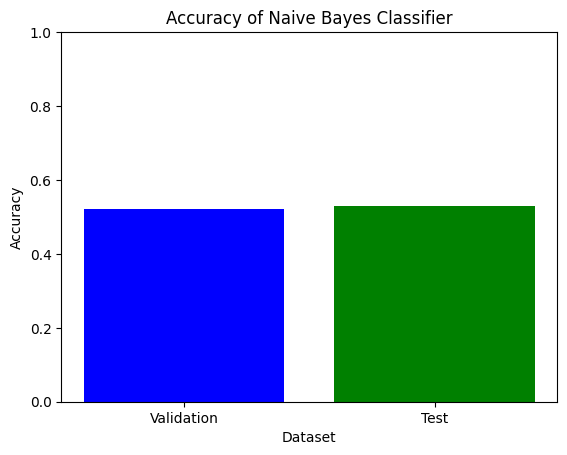

In [ ]:
# Accuracy values
accuracies = [valid_accuracy_nb, test_accuracy_nb]

# Labels for the bars
labels = ['Validation', 'Test']

# Plotting
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy of Naive Bayes Classifier')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for better visualization
plt.show()

**Convulational Neural Network (CNN) - Sequential**

When used for audio classification tasks, a Convolutional Neural Network (CNN) with a sequential architecture is a potent deep learning model. CNNs use convolutional layers, as opposed to typical feedforward neural networks, to extract relevant features from input audio waveforms or spectrograms. After these layers, the collected features are downsampled using pooling procedures, which lower computational complexity while preserving crucial information. The network can interpret audio classes and learn intricate patterns thanks to the numerous layers that come after it. CNNs have shown impressive performance in applications such as speech recognition, music genre categorization, and ambient sound detection, thanks to their autonomous learning of hierarchical representations.

In [ ]:
# making our data compatible to model.
x_train_cnn = np.expand_dims(x_train, axis=2)
x_valid_cnn = np.expand_dims(x_valid, axis=2)

In [ ]:
# make a sequential model
model_cnn=Sequential()

# add convolutional and max pooling layers with relu activation function and same padding
model_cnn.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_cnn.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_cnn.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

# add dropout layer
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

# add flatten layer to flatten input
model_cnn.add(Flatten())
model_cnn.add(Dense(units=32, activation='relu'))
model_cnn.add(Dropout(0.3))

# add output layer and compile using adam optimizer
model_cnn.add(Dense(units=6, activation='softmax'))
model_cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

#display model summary
model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 360, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 180, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 180, 256)            │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 90, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 90, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 45, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1472)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          47,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581,798 (2.22 MB)

 Trainable params: 581,798 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# print the shape of our data
x_train_cnn.shape, y_train.shape, x_valid_cnn.shape, y_valid.shape

((2670, 360, 1), (2670, 6), (472, 360, 1), (472, 6))

In [ ]:
# train the model
epochs = 15
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = model_cnn.fit(x_train_cnn, y_train, batch_size=64, epochs=epochs, validation_data=(x_valid_cnn, y_valid), callbacks=[rlrp])

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.2914 - loss: 1.6634 - val_accuracy: 0.5127 - val_loss: 1.2874 - learning_rate: 0.0010
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 78s 983ms/step - accuracy: 0.5172 - loss: 1.2566 - val_accuracy: 0.7161 - val_loss: 0.8177 - learning_rate: 0.0010
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 978ms/step - accuracy: 0.6209 - loss: 0.9681 - val_accuracy: 0.7415 - val_loss: 0.7117 - learning_rate: 0.0010
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 1000ms/step - accuracy: 0.6604 - loss: 0.8419 - val_accuracy: 0.7521 - val_loss: 0.6863 - learning_rate: 0.0010
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6834 - loss: 0.7750 - val_accuracy: 0.7564 - val_loss: 0.6286 - learning_rate: 0.0010
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7112 - loss: 0.6933 - val_accuracy: 0.7606 - val_loss: 0.5999 - learning_rate: 0.0010
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7240 - loss: 0.6550 - val_

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.8137 - loss: 0.4873
Accuracy of our model on Validtion data :  80.93220591545105 %


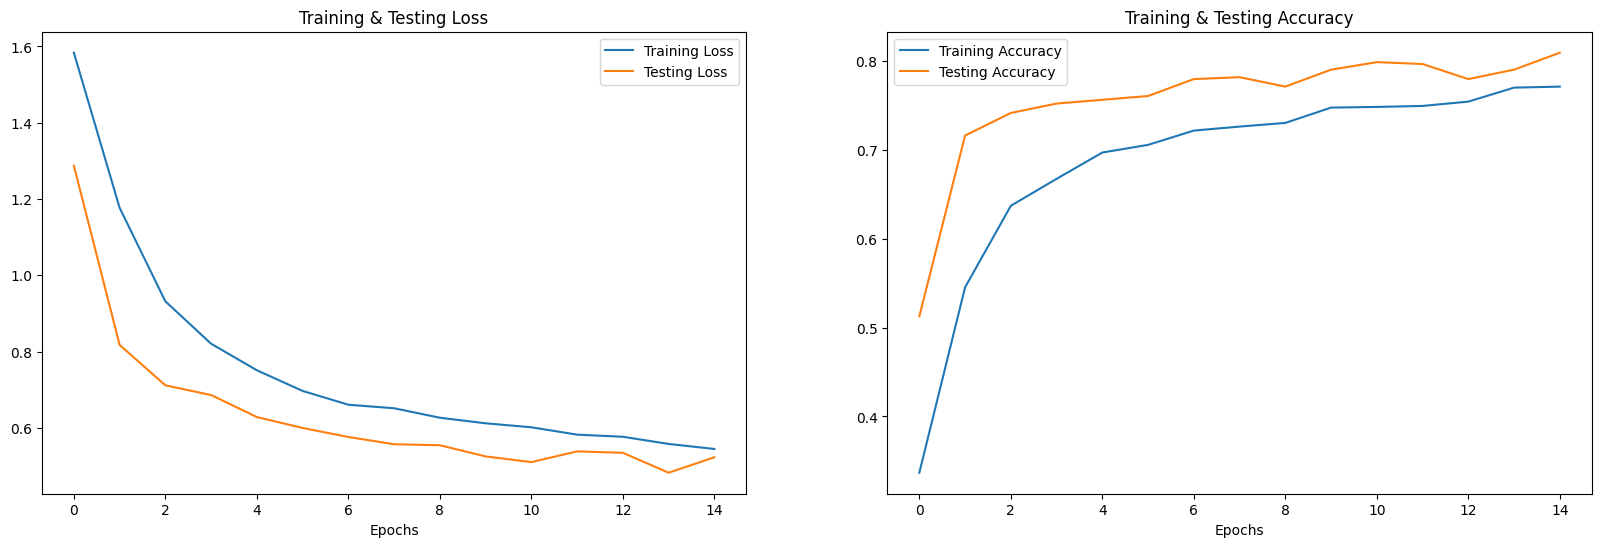

In [ ]:
# Display the accuracy in terms of line plots for validation data
print("Accuracy of our model on Validtion data : " , model_cnn.evaluate(x_valid_cnn,y_valid)[1]*100 , "%")

epochs = [i for i in range(epochs)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on testing data
y_predictions = model_cnn.predict(np.expand_dims(X_test_scaled, axis=2))
y_pred = encoder.inverse_transform(y_predictions)
print(classification_report(y_test, y_pred))

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step
              precision    recall  f1-score   support

       angry       0.87      0.85      0.86        92
     disgust       0.69      0.79      0.74        92
        fear       0.84      0.82      0.83        92
       happy       0.78      0.80      0.79        93
     neutral       0.82      0.84      0.83        93
         sad       0.87      0.75      0.81        92

    accuracy                           0.81       554
   macro avg       0.81      0.81      0.81       554
weighted avg       0.81      0.81      0.81       554



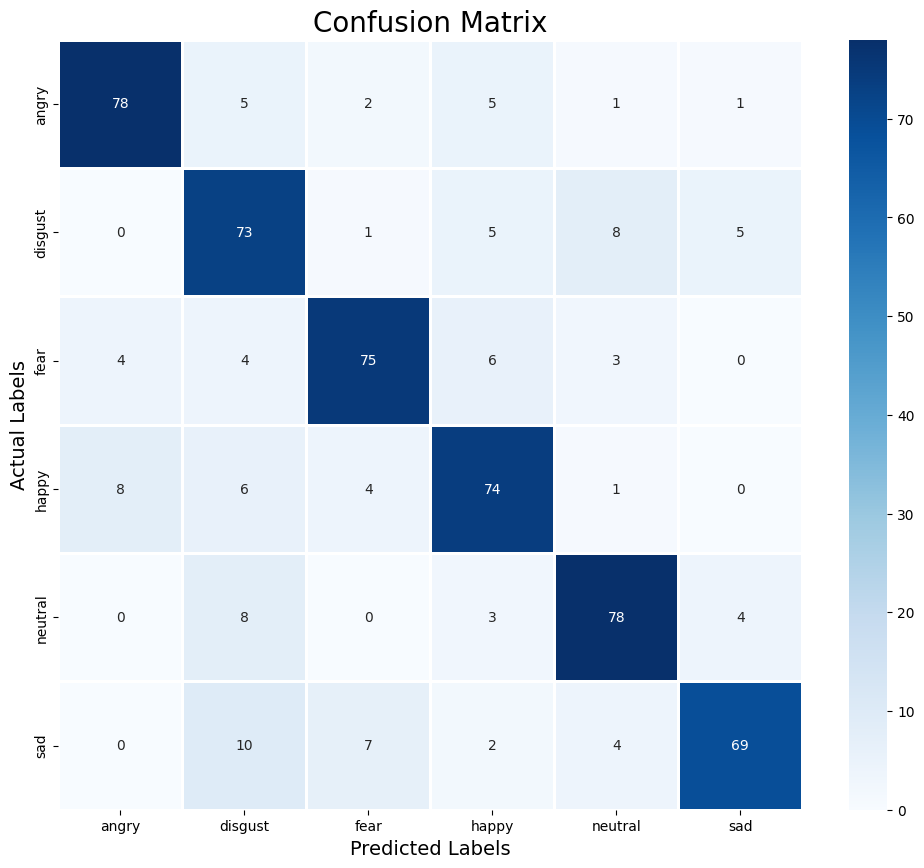

In [ ]:
# print the confusion matrix since the model showed a high accuracy
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
model_cnn.save('/content/drive/MyDrive/model_cnn.h5') # save the model if required to use again

**Multilayer Perceptron (MLP) Classifier**

A Multilayer Perceptron (MLP) Classifier is a type of artificial neural network that consists of multiple layers of nodes, including an input layer, one or more hidden layers, and an output layer. MLPs are good at processing flattened feature vectors, but they do not instinctively take into account spatial correlations in data, such as pictures or spectrograms, the procedure CNNs do. Mel-frequency cepstral coefficients (MFCCs) and spectrogram-based features are two examples of characteristics that can be used to train MLP classifiers for audio classification in order to predict the appropriate classes. MLPs are flexible and may be tailored to a variety of classification tasks, including audio classification, by carefully selecting the input features and network architecture. This is contrary to CNNs, which are more spatially aware.

In [ ]:
# We perform hyperparameter tuning using the optuna library alongside a 5 fold cross validation for this model
def objective(trial):
    # Initialize the stratified k-fold cross-validator

        # Define model parameters to optimize
    model_params = {
        'alpha': trial.suggest_float('alpha', 1e-6, 1e-2, log = True),  # Widened search space for alpha
        'batch_size': trial.suggest_categorical('batch_size', [32, 64, 128]),
        'epsilon': trial.suggest_float('epsilon', 1e-10, 1e-5, log = True),  # Widened search space for epsilon
        'hidden_layer_sizes': (trial.suggest_int('hidden_layer_sizes', 50, 200),),
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive']),
        'max_iter': trial.suggest_int('max_iter', 100, 2000),  # Widened search space for max_iter
    }

    # Initialize MLP classifier
    model_mlp = MLPClassifier(**model_params)

    k_fold = 5 # validate over 5 folds
    stratified_kfold = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)

    # Lists to store accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X,y['0']):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        # Fit the model on the training data
        model_mlp.fit(X_train, y_train.values.ravel())

        # Make predictions on the test data
        y_pred = model_mlp.predict(X_test)

        # Calculate accuracy and append to accuracy scores list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Calculate and print the mean and standard deviation of accuracy scores
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    std_deviation = np.std(accuracy_scores)

    print(f'accuracy score: {accuracy_scores}' )
    print(f'mean accuracy score: {mean_accuracy}' )

    return np.sqrt((1-mean_accuracy) ** 2 + std_deviation**2) #combine both the mean accuracy and the standard deviation into a single metric


# Define the study object and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Get the best parameters
best_params = study.best_params


[I 2025-02-03 04:11:00,658] A new study created in memory with name: no-name-259bc8e6-8452-4afc-af85-990d24061821
[I 2025-02-03 04:12:17,126] Trial 0 finished with value: 0.1922831913271864 and parameters: {'alpha': 7.567737336646962e-06, 'batch_size': 32, 'epsilon': 7.505189326123331e-06, 'hidden_layer_sizes': 150, 'learning_rate': 'constant', 'max_iter': 1918}. Best is trial 0 with value: 0.1922831913271864.


accuracy score: [0.8139904610492846, 0.7965023847376789, 0.8296178343949044, 0.7770700636942676, 0.8264331210191083]
mean accuracy score: 0.8087227729790488


[I 2025-02-03 04:13:39,639] Trial 1 finished with value: 0.17806018816369693 and parameters: {'alpha': 4.507680780383898e-05, 'batch_size': 32, 'epsilon': 2.2033304594843288e-10, 'hidden_layer_sizes': 174, 'learning_rate': 'adaptive', 'max_iter': 1351}. Best is trial 1 with value: 0.17806018816369693.


accuracy score: [0.8426073131955485, 0.8060413354531002, 0.7882165605095541, 0.8455414012738853, 0.8343949044585988]
mean accuracy score: 0.8233603029781374


[I 2025-02-03 04:14:19,778] Trial 2 finished with value: 0.19368885131335342 and parameters: {'alpha': 0.0005575463494813938, 'batch_size': 128, 'epsilon': 1.345318762217468e-08, 'hidden_layer_sizes': 193, 'learning_rate': 'adaptive', 'max_iter': 784}. Best is trial 1 with value: 0.17806018816369693.


accuracy score: [0.8282988871224165, 0.7821939586645469, 0.8073248407643312, 0.7929936305732485, 0.8248407643312102]
mean accuracy score: 0.8071304162911506


[I 2025-02-03 04:15:39,043] Trial 3 finished with value: 0.1683577217103133 and parameters: {'alpha': 3.197227847840951e-06, 'batch_size': 32, 'epsilon': 5.7447536586527e-09, 'hidden_layer_sizes': 125, 'learning_rate': 'constant', 'max_iter': 1537}. Best is trial 3 with value: 0.1683577217103133.


accuracy score: [0.8394276629570747, 0.821939586645469, 0.8439490445859873, 0.8089171974522293, 0.8471337579617835]
mean accuracy score: 0.8322734499205087


[I 2025-02-03 04:16:23,138] Trial 4 finished with value: 0.18329368019513242 and parameters: {'alpha': 3.0195216901839413e-05, 'batch_size': 128, 'epsilon': 2.0168389342644707e-08, 'hidden_layer_sizes': 189, 'learning_rate': 'constant', 'max_iter': 1627}. Best is trial 3 with value: 0.1683577217103133.


accuracy score: [0.8298887122416534, 0.794912559618442, 0.8550955414012739, 0.7898089171974523, 0.821656050955414]
mean accuracy score: 0.8182723562828471


[I 2025-02-03 04:17:32,128] Trial 5 finished with value: 0.19680083308143898 and parameters: {'alpha': 0.0037303013280649763, 'batch_size': 32, 'epsilon': 1.8497630904244632e-08, 'hidden_layer_sizes': 155, 'learning_rate': 'constant', 'max_iter': 1312}. Best is trial 3 with value: 0.1683577217103133.


accuracy score: [0.834658187599364, 0.8378378378378378, 0.8152866242038217, 0.767515923566879, 0.7722929936305732]
mean accuracy score: 0.8055183133676952


[I 2025-02-03 04:18:04,622] Trial 6 finished with value: 0.2051064884074418 and parameters: {'alpha': 4.24488706447067e-06, 'batch_size': 64, 'epsilon': 1.058171853081078e-06, 'hidden_layer_sizes': 107, 'learning_rate': 'adaptive', 'max_iter': 573}. Best is trial 3 with value: 0.1683577217103133.


accuracy score: [0.7996820349761526, 0.78060413354531, 0.7882165605095541, 0.7882165605095541, 0.8200636942675159]
mean accuracy score: 0.7953565967616173


[I 2025-02-03 04:18:42,401] Trial 7 finished with value: 0.17983932037638342 and parameters: {'alpha': 1.4926433665612348e-05, 'batch_size': 64, 'epsilon': 2.823497907675511e-07, 'hidden_layer_sizes': 82, 'learning_rate': 'invscaling', 'max_iter': 225}. Best is trial 3 with value: 0.1683577217103133.


accuracy score: [0.8076311605723371, 0.8187599364069952, 0.8519108280254777, 0.7977707006369427, 0.8296178343949044]
mean accuracy score: 0.8211380920073313


[I 2025-02-03 04:19:13,844] Trial 8 finished with value: 0.19769423013762502 and parameters: {'alpha': 0.004432641712138769, 'batch_size': 128, 'epsilon': 1.1939245886346132e-09, 'hidden_layer_sizes': 95, 'learning_rate': 'invscaling', 'max_iter': 525}. Best is trial 3 with value: 0.1683577217103133.


accuracy score: [0.8235294117647058, 0.8060413354531002, 0.8009554140127388, 0.7738853503184714, 0.8105095541401274]
mean accuracy score: 0.8029842131378289
accuracy score: [0.8362480127186009, 0.809220985691574, 0.8168789808917197, 0.8009554140127388, 0.7977707006369427]
mean accuracy score: 0.8122148187903152


In [ ]:
#print the best parameters
print("Best parameters:", best_params)

Best parameters: {'alpha': 3.197227847840951e-06, 'batch_size': 32, 'epsilon': 5.7447536586527e-09, 'hidden_layer_sizes': 125, 'learning_rate': 'constant', 'max_iter': 1537}


In [ ]:
#store the model in best_model since it performed the best and fit it
best_model = MLPClassifier(**study.best_params)
best_model.fit(X, y.values.ravel())

MLPClassifier(alpha=3.197227847840951e-06, batch_size=32,
              epsilon=5.7447536586527e-09, hidden_layer_sizes=125,
              max_iter=1537)

In [ ]:
# Make predictions on the test data
y_pred_mlp = best_model.predict(pd.DataFrame(X_test))

# Calculate accuracy and append to accuracy scores list
accuracy = accuracy_score(y_test, y_pred_mlp)
print(accuracy)

0.8628158844765343


In [ ]:
#print the classification report
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

       angry       0.89      0.92      0.90        92
     disgust       0.90      0.87      0.88        92
        fear       0.72      0.93      0.82        92
       happy       0.93      0.80      0.86        93
     neutral       0.85      0.94      0.89        93
         sad       0.97      0.72      0.82        92

    accuracy                           0.86       554
   macro avg       0.88      0.86      0.86       554
weighted avg       0.88      0.86      0.86       554



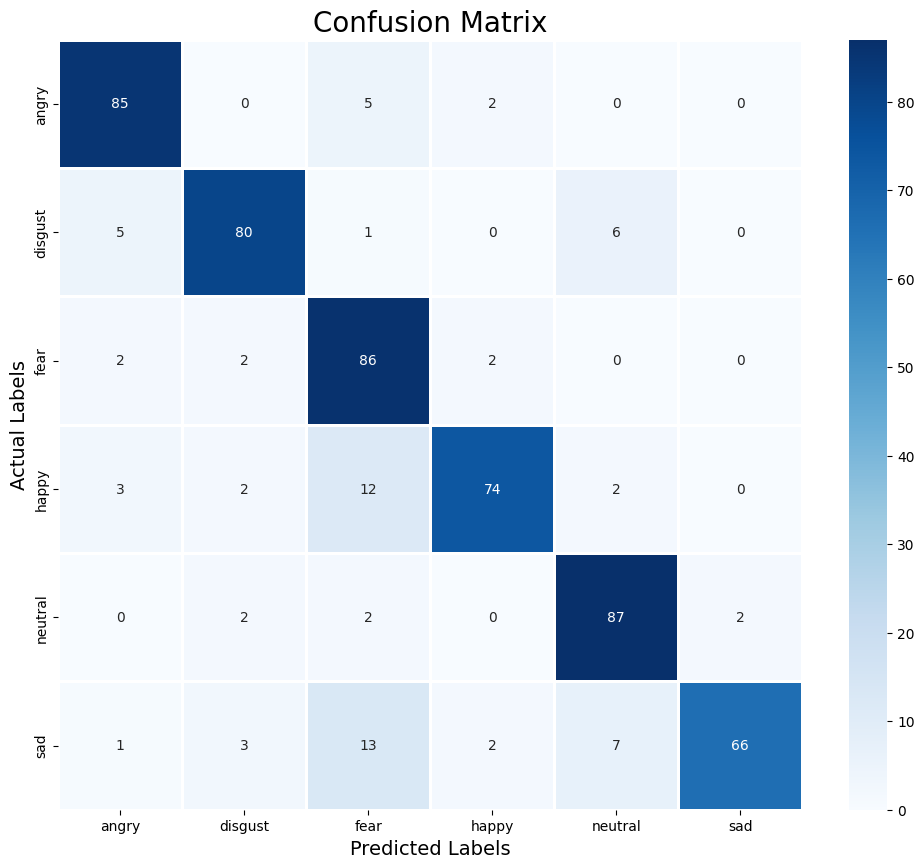

In [ ]:
#print the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
# Save the trained model for the front end
# Serialize and save the MLP classifier model
with open('/content/drive/MyDrive/mlp_classifier_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# **The Front End and Future Steps**

Finally, after determining our best model, the MLP classifier, and saving all necessary files as pickle files - encoder, scaler and model, we build our front end using streamlit.

Here we offer the chance to our audience to test our dataset, using their own voice. The principle behind this remains the same, as we use the audio standardization function, and feature extraction, followed by scaling and encoding as defined. Lastly, we predict using our model on the new test data to display the possible emotion of the recording.

With respect to the future steps, it is essential to consider that even though the model is performing well in terms of its accuracy, the datasets in use are highly biasd towards a specific category of people. It would be ideal to gather more data points in the future, in terms of gender and racial diversity for a better and all encompassing solution.